In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from IPython.display import HTML
from matplotlib.gridspec import GridSpec
import scipy.spatial as spsp
# %matplotlib notebook #av en eller annen grunn er notebook raskere enn inline

In [3]:
def superEllipse(theta, a, b, N):
    return (np.abs(np.cos(theta)/a)**N+np.abs(np.sin(theta)/b)**N)**(-1/N)

def plotAnimation(videoname="Test.mp4", title = fr"Circular wall", polArrow=False, fArrows=False, smallFrame=False, smallerParticles=False):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    print(NP, R, DT, samples, XI, wall, EPS, RP, a, b, N)
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    #Set xlim and ylim to fit the wall if rectangular
    if wall==2:
        xyneg=-(np.sqrt(NP)*RP+RP/2 + 2*RP)
        xypos=np.sqrt(NP)*RP+RP/2+2*RP
    else:
        xyneg=-R-1
        xypos=R+1
    fig=plt.figure(figsize=[7, 7])
    # ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-R-1, R+1), ylim=(-R-1, R+1))
    if smallFrame==True:
        ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(0, R+1), ylim=(0, R+1))
    else:
        ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(xyneg, xypos), ylim=(xyneg, xypos))
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    points_whole_ax = 7 * 0.8 * 72    # 1 point = dpi / 72 pixels
    # radius = fil[0][0][3] #radius of the points
    # points_radius = 2 * radius / (2*(xypos)) * points_whole_ax
    points_radius = 2 * fil[0][:,3] / (2*(xypos)) * points_whole_ax
    if smallerParticles==True:
        scat=ax.scatter(fil[0][:,0],fil[0][:,1], s=points_radius**2/3)#, color="#FFD700")#"#09833F") #vurder å putt på edgecolor='black'
    else:
        scat=ax.scatter(fil[0][:,0],fil[0][:,1], s=points_radius**2)
    if wall==0:
        circle = plt.Circle( ( 0, 0 ), R , color='black', fill=False)
        ax.add_artist(circle)
    if wall==1:
        square = plt.Rectangle((-R, -R), 2*R, 2*R, color='black', fill=False)
        ax.add_artist(square)
    if wall==2:
        rect = plt.Rectangle((-(np.sqrt(NP)*RP+RP/2), -(np.sqrt(NP)-1)*(np.sqrt(3)/2)*RP-RP), 2*np.sqrt(NP)*RP+RP, (np.sqrt(NP)-1)*RP*np.sqrt(3)+2*RP, color='black', fill=False)
        ax.add_artist(rect)
    if wall==3:
        ax.plot((-R*np.cos(np.pi/6), R*np.cos(np.pi/6), 0, -R*np.cos(np.pi/6)), (-R*np.sin(np.pi/6), -R*np.sin(np.pi/6), R, -R*np.sin(np.pi/6)), color='black')
    if wall==4:
        theta = np.linspace(0, 2*np.pi, 100000)
        r = superEllipse(theta, a, b, N)
        ax.plot(r*np.cos(theta), r*np.sin(theta), color='black')
    if (polArrow==True and fArrows==True):
        qr = ax.quiver(fil[0][:,0],fil[0][:,1], np.cos(fil[0][:, 2]), np.sin(fil[0][:, 2]), scale=40)#, color="#FFD700")
        qr2 = ax.quiver(fil[0][:,0],fil[0][:,1], filf[0][:, 0], filf[0][:, 1], scale=40, color='r')
        def animate(i):
            if smallerParticles==True:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2/3)
            else:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
            # scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2/3)
            scat.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_UVC(np.cos(fil[i][:, 2]), np.sin(fil[i][:, 2]))
            qr2.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr2.set_UVC(filf[i][:, 0], filf[i][:, 1])
    elif polArrow==True:
        qr = ax.quiver(fil[0][:,0],fil[0][:,1], np.cos(fil[0][:, 2]), np.sin(fil[0][:, 2]), scale=0.7, scale_units='x')
        def animate(i):
            if smallerParticles==True:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2/3)
            else:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
            # scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
            scat.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_UVC(np.cos(fil[i][:, 2]), np.sin(fil[i][:, 2]))
    elif fArrows==True:
        qr = ax.quiver(fil[0][:,0],fil[0][:,1], filf[0][:, 0], filf[0][:, 1], scale=0.7, scale_units='x', color='r')
        def animate(i):
            if smallerParticles==True:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2/3)
            else:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
            scat.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
            qr.set_UVC(filf[i][:, 0], filf[i][:, 1])
    else:
        def animate(i):
            if smallerParticles==True:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2/3)
            else:
                scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
            scat.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])

    anim = FuncAnimation(fig, animate, interval=50, frames=samples, repeat=False)
    anim.save(videoname, writer='ffmpeg', dpi=90) 

    # return HTML(anim.to_html5_video())

In [4]:
def superEllipse(theta, a, b, N):
    return (np.abs(np.cos(theta)/a)**N+np.abs(np.sin(theta)/b)**N)**(-1/N)

def plotAnimation1part(particle, videoname="Test.mp4", title = fr"Circular wall", polArrow=True, fArrows=True, smallFrame=False, smallerParticles=False):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)

    print("hei")
    fil = fil[(samples-200)::][::, ::]
    filf = filf[(samples-200)::][::, ::]

    fig=plt.figure(figsize=[7, 7])
    ax = plt.axes()

    ax.set_title(title, fontsize=20)
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)

    scat=ax.scatter(fil[0][particle,0],fil[0][particle,1])

    if (polArrow==True and fArrows==True):
        qr = ax.quiver(fil[0][particle,0],fil[0][particle,1], np.cos(fil[0][particle, 2]), np.sin(fil[0][particle, 2]))#, color="#FFD700")
        qr2 = ax.quiver(fil[0][particle,0],fil[0][particle,1], filf[0][particle, 0], filf[0][particle, 1], color='r')
        def animate(i):
            if (i%50 == 0):
                print(i)

            scat.set_offsets(np.c_[fil[i][particle,0],fil[i][particle,1]])
            qr.set_offsets(np.c_[fil[i][particle,0],fil[i][particle,1]])
            qr.set_UVC(np.cos(fil[i][particle, 2]), np.sin(fil[i][particle, 2]))
            qr2.set_offsets(np.c_[fil[i][particle,0],fil[i][particle,1]])
            qr2.set_UVC(filf[i][particle, 0], filf[i][particle, 1])


    anim = FuncAnimation(fig, animate, interval=100, frames=200, repeat=False)
    anim.save(videoname, writer='ffmpeg', dpi=90) 

hei
0
0
50
100
150


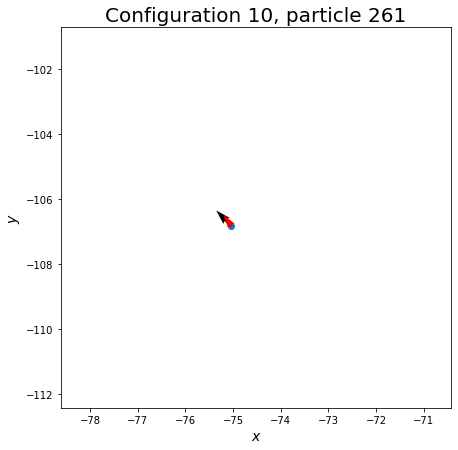

In [45]:
plotAnimation1part(261, "Videos/config10sim16particle261.mp4", "Configuration 10, particle 261")

In [5]:
def plotAnimationhsv(videoname="Test.mp4", title = fr"Circular wall"):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    #Make sure the variables are of the right type
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    #Load the data
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    #Set xlim and ylim to fit the wall if rectangular
    if wall==2:
        xypos=-(np.sqrt(NP)*RP+RP/2 + 2*RP)
        xyneg=np.sqrt(NP)*RP+RP/2+2*RP
    else:
        xypos=-R-1
        xyneg=R+1
    #Create the figure
    fig=plt.figure(figsize=[7, 7])
    ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(xyneg, xypos), ylim=(xyneg, xypos))
    ax.set_title(title+fr" , $\xi$={XI}", fontsize=20)
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    points_whole_ax = 7 * 0.8 * 72    # 1 point = dpi / 72 pixels
    # radius = fil[0][0][3] #radius of the points
    # points_radius = 2 * radius / (2*(xypos)) * points_whole_ax
    points_radius = 2 * fil[0][:,3] / (2*(xypos)) * points_whole_ax
    # scat=ax.scatter(fil[0][:,0],fil[0][:,1], s=points_radius**2, c=np.mod(fil[0][:, 2], 2*np.pi), cmap="hsv")#, color="#FFD700")#"#09833F") #vurder å putt på edgecolor='black'
    scat=ax.scatter(fil[0][:,0],fil[0][:,1], s=points_radius**2, c=fil[0][:, 3], cmap="hsv")#, color="#FFD700")#"#09833F") #vurder å putt på edgecolor='black'
    #Add the wall
    if wall==0:
        circle = plt.Circle( ( 0, 0 ), R , color='black', fill=False)
        ax.add_artist(circle)
    if wall==1:
        square = plt.Rectangle((-R, -R), 2*R, 2*R, color='black', fill=False)
        ax.add_artist(square)
    if wall==2:
        rect = plt.Rectangle((-(np.sqrt(NP)*RP+RP/2), -(np.sqrt(NP)-1)*(np.sqrt(3)/2)*RP-RP), 2*np.sqrt(NP)*RP+RP, (np.sqrt(NP)-1)*RP*np.sqrt(3)+2*RP, color='black', fill=False)
        ax.add_artist(rect)
    if wall==3:
        ax.plot((-R*np.cos(np.pi/6), R*np.cos(np.pi/6), 0, -R*np.cos(np.pi/6)), (-R*np.sin(np.pi/6), -R*np.sin(np.pi/6), R, -R*np.sin(np.pi/6)), color='black')
    if wall==4:
        theta = np.linspace(0, 2*np.pi, 100000)
        r = superEllipse(theta, a, b, N)
        ax.plot(r*np.cos(theta), r*np.sin(theta), color='black')
    ax.set_aspect('equal')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    # #Add the polarization and force arrows
    # qr = ax.quiver(fil[0][:,0],fil[0][:,1], np.cos(fil[0][:, 2]), np.sin(fil[0][:, 2]), scale=0.7, scale_units='x')#, color="#FFD700")
    # qr2 = ax.quiver(fil[0][:,0],fil[0][:,1], filf[0][:, 0], filf[0][:, 1], scale=0.7, scale_units='x', color='r')
    def animate(i):
        scat.set_sizes((2 * (fil[i][:,3]) / (2*(xypos)) * points_whole_ax)**2)
        scat.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
        # scat.set_array(np.mod(fil[i][:, 2], 2*np.pi))
        # qr.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
        # qr.set_UVC(np.cos(fil[i][:, 2]), np.sin(fil[i][:, 2]))
        # qr2.set_offsets(np.c_[fil[i][:,0],fil[i][:,1]])
        # qr2.set_UVC(filf[i][:, 0], filf[i][:, 1])

    # cbar = plt.colorbar(scat, orientation='vertical')
    # cbar.set_label('Polarization angle (radians)')

    anim = FuncAnimation(fig, animate, interval=10, frames=samples, repeat=False)
    anim.save(videoname, writer='ffmpeg', dpi=90) 

    # plt.figure(figsize=[7, 7])
    # cbar = plt.colorbar(scat, orientation='vertical')
    # cbar.set_label('Polarization angle (radians)')
    # plt.show()

    # return HTML(anim.to_html5_video())

In [6]:
def plotFrame(figname, framenr, polArrow=False, fArrows=False, smallFrame=False, smallerParticles=False):
    [NP, R, DT, samples, XI, wall, EPS, RP, a, b, N]=np.loadtxt("Info.txt")
    NP=int(NP)
    samples=int(samples)
    wall=int(wall)
    fil=np.loadtxt("Utvikling.txt").reshape(samples, NP, 4)
    filf=np.loadtxt("Kraft.txt").reshape(samples, NP, 2)
    #Set xlim and ylim to fit the wall if rectangular
    if wall==2:
        xypos=-(np.sqrt(NP)*RP+RP/2 + 2*RP)
        xyneg=np.sqrt(NP)*RP+RP/2+2*RP
    else:
        xypos=-R-1
        xyneg=R+1
    fig=plt.figure(figsize=[7, 7])
    # ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-R-1, R+1), ylim=(-R-1, R+1))
    if smallFrame==True:
        ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-R-1, -140), ylim=(0, 60))
    else:
        ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(xyneg, xypos), ylim=(xyneg, xypos))
    ax.set_xlabel(r"$x$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    points_whole_ax = 7 * 0.8 * 72    # 1 point = dpi / 72 pixels
    # radius = fil[0][0][3] #radius of the points
    # points_radius = 2 * radius / (2*(xypos)) * points_whole_ax
    points_radius = 2 * fil[framenr][:,3] / (2*(xypos)) * points_whole_ax
    if smallerParticles==True:
        scat=ax.scatter(fil[framenr][:,0],fil[framenr][:,1], s=points_radius**2/0.08)#, color="#FFD700")#"#09833F") #vurder å putt på edgecolor='black'
    else:
        scat=ax.scatter(fil[framenr][:,0],fil[framenr][:,1], s=points_radius**2)
    if wall==0:
        circle = plt.Circle( ( 0, 0 ), R , color='black', fill=False)
        ax.add_artist(circle)
    if wall==1:
        square = plt.Rectangle((-R, -R), 2*R, 2*R, color='black', fill=False)
        ax.add_artist(square)
    if wall==2:
        rect = plt.Rectangle((-(np.sqrt(NP)*RP+RP/2), -(np.sqrt(NP)-1)*(np.sqrt(3)/2)*RP-RP), 2*np.sqrt(NP)*RP+RP, (np.sqrt(NP)-1)*RP*np.sqrt(3)+2*RP, color='black', fill=False)
        ax.add_artist(rect)
    if wall==3:
        ax.plot((-R*np.cos(np.pi/6), R*np.cos(np.pi/6), 0, -R*np.cos(np.pi/6)), (-R*np.sin(np.pi/6), -R*np.sin(np.pi/6), R, -R*np.sin(np.pi/6)), color='black')
    if wall==4:
        theta = np.linspace(0, 2*np.pi, 100000)
        r = superEllipse(theta, a, b, N)
        ax.plot(r*np.cos(theta), r*np.sin(theta), color='black')
    if (polArrow==True and fArrows==True):
        qr = ax.quiver(fil[framenr][:,0],fil[framenr][:,1], np.cos(fil[framenr][:, 2]), np.sin(fil[framenr][:, 2]), scale=0.7, scale_units='x')#, color="#FFD700")
        qr2 = ax.quiver(fil[framenr][:,0],fil[framenr][:,1], filf[framenr][:, 0], filf[framenr][:, 1], scale=0.7, scale_units='x', color='r')
    elif polArrow==True:
        qr = ax.quiver(fil[framenr][:,0],fil[framenr][:,1], np.cos(fil[framenr][:, 2]), np.sin(fil[framenr][:, 2]), scale=0.7, scale_units='x')
    elif fArrows==True:
        qr = ax.quiver(fil[framenr][:,0],fil[framenr][:,1], filf[framenr][:, 0], filf[framenr][:, 1], scale=0.7, scale_units='x', color='r')
    plt.axis("off")
    plt.savefig(figname, bbox_inches='tight', pad_inches=0)
    plt.show()

1000.0 50.0 0.0001 1001.0 15.0 0.0 50.0 1.5737 50.0 50.0 4.0


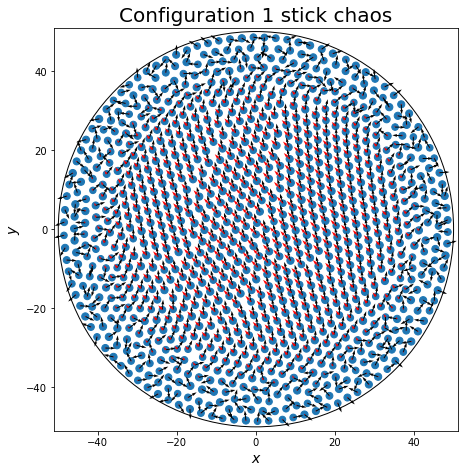

In [27]:
plotAnimation(videoname="Videos/Config1/Config1StickTest13.mp4", title = fr"Configuration 1 stick chaos", polArrow=True, fArrows=True, smallFrame=False, smallerParticles=True)

1000.0 50.0 0.0001 1001.0 200.0 0.0 50.0 1.5737 50.0 50.0 4.0


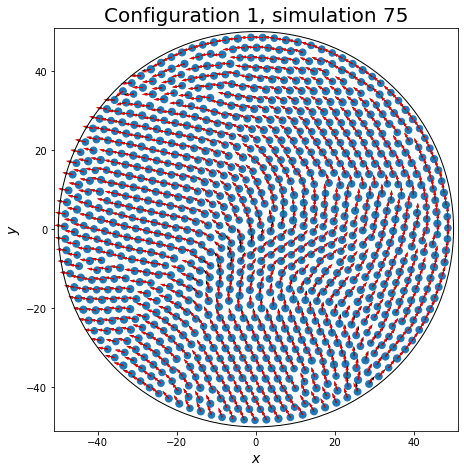

In [123]:
plotAnimation(videoname="Videos/Config1/Config1Test3.mp4", title = fr"Configuration 1, simulation 75", polArrow=True, fArrows=True, smallFrame=False, smallerParticles=True)

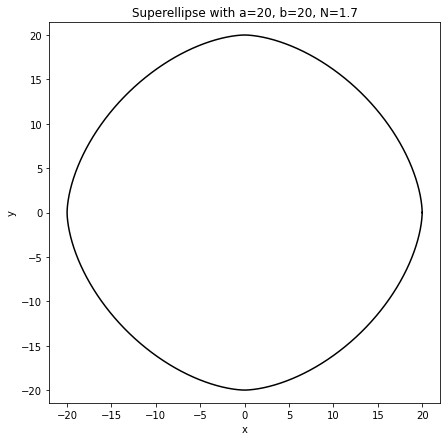

In [131]:
#plotting superellipse
a = 20
b = 20
N = 1.7
plt.figure(figsize=[7, 7])
theta = np.linspace(0, 2*np.pi, 100000)
r = superEllipse(theta, a, b, N)
plt.plot(r*np.cos(theta), r*np.sin(theta), color='black')
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Superellipse with a={a}, b={b}, N={N}")
plt.show()